In [24]:
import pandas as pd

In [25]:
chipo = pd.read_csv('../csv/num_1/chipotle.tsv', sep='\t')

In [26]:
chipo.head()

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98


### 문제
1. 가장 많이 주문한 item_name과 그 수량을 출력
2. item당 주문 총량을 구하고 바형 그래프 표시
3. item_price 컬럼의 데이터에서 "$"표시를 제거하고 float 의 형태로 데이터 변환
4. order_id의 데이터 타입을 str으로 변경
5. 주문당 평균 게산 금액 출력

In [27]:
chipo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            4622 non-null   int64 
 1   quantity            4622 non-null   int64 
 2   item_name           4622 non-null   object
 3   choice_description  3376 non-null   object
 4   item_price          4622 non-null   object
dtypes: int64(2), object(3)
memory usage: 180.7+ KB


In [38]:
# 1. 가장 많이 주문한 item_name과 그 수량을 출력

group_data = chipo.groupby('item_name').sum()['quantity'].sort_values(ascending=False)
#group_data = chipo.groupby('item_name').sum().sort_values(['quantity'],ascending=False)
group_data.head()

C:\Users\ezen\AppData\Local\Temp\ipykernel_3900\779681205.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  group_data = chipo.groupby('item_name').sum()['quantity'].sort_values(ascending=False)


item_name
Chicken Bowl           761
Chicken Burrito        591
Chips and Guacamole    506
Steak Burrito          386
Canned Soft Drink      351
Name: quantity, dtype: int64

In [41]:
#import matplotlib.pylab as plt
import matplotlib.pyplot as plt

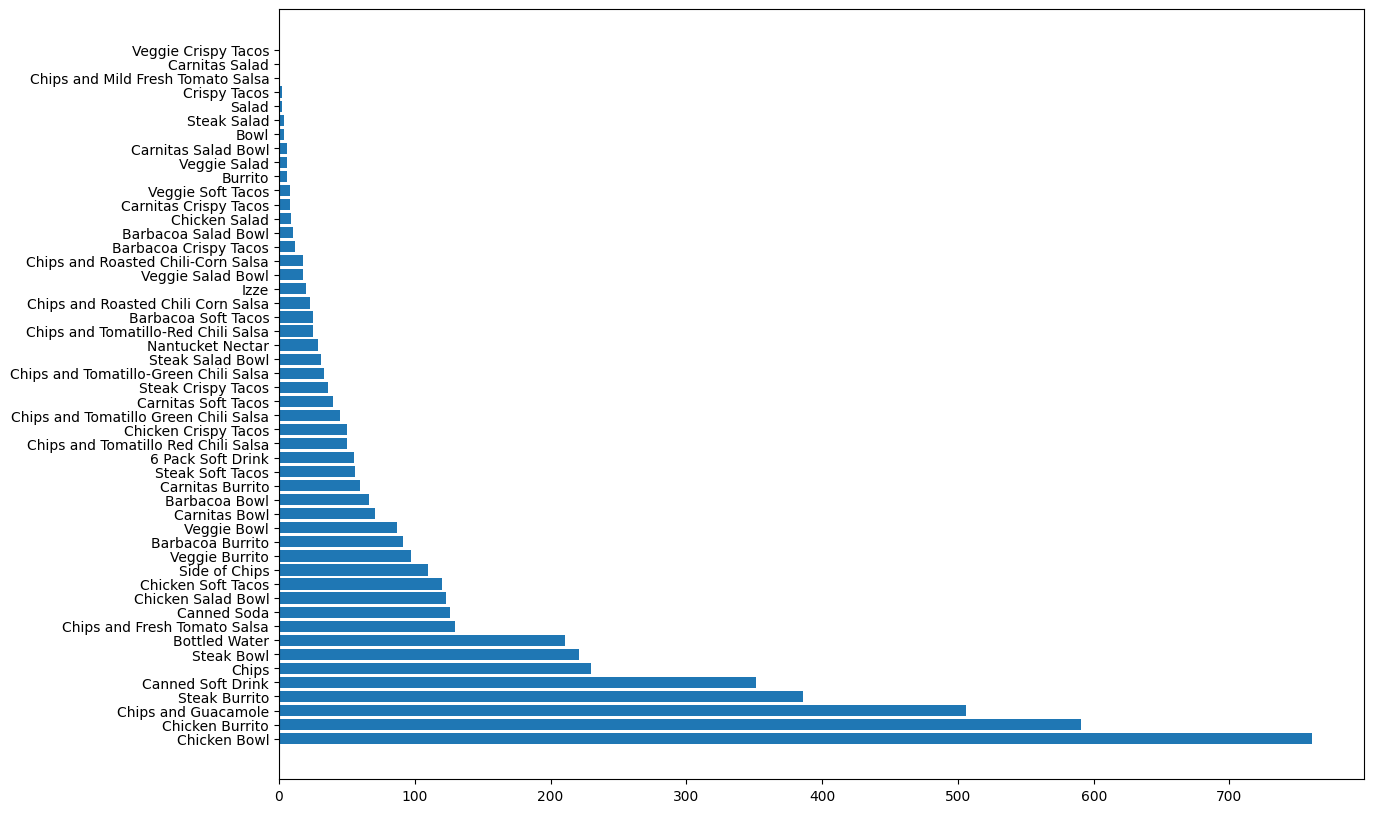

In [42]:
# bar 그래프는 x. y 값이 필요
x = group_data.index
y = group_data.values
plt.figure(figsize=(14,10))
plt.barh(x,y)
plt.show()

In [43]:
group_data2 = chipo.groupby('item_name').sum().sort_values('quantity',ascending=False).reset_index()
group_data2.head(5)

C:\Users\ezen\AppData\Local\Temp\ipykernel_3900\2885911162.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  group_data2 = chipo.groupby('item_name').sum().sort_values('quantity',ascending=False).reset_index()


,item_name,order_id,quantity
0,Chicken Bowl,713926,761
1,Chicken Burrito,497303,591
2,Chips and Guacamole,449959,506
3,Steak Burrito,328437,386
4,Canned Soft Drink,304753,351


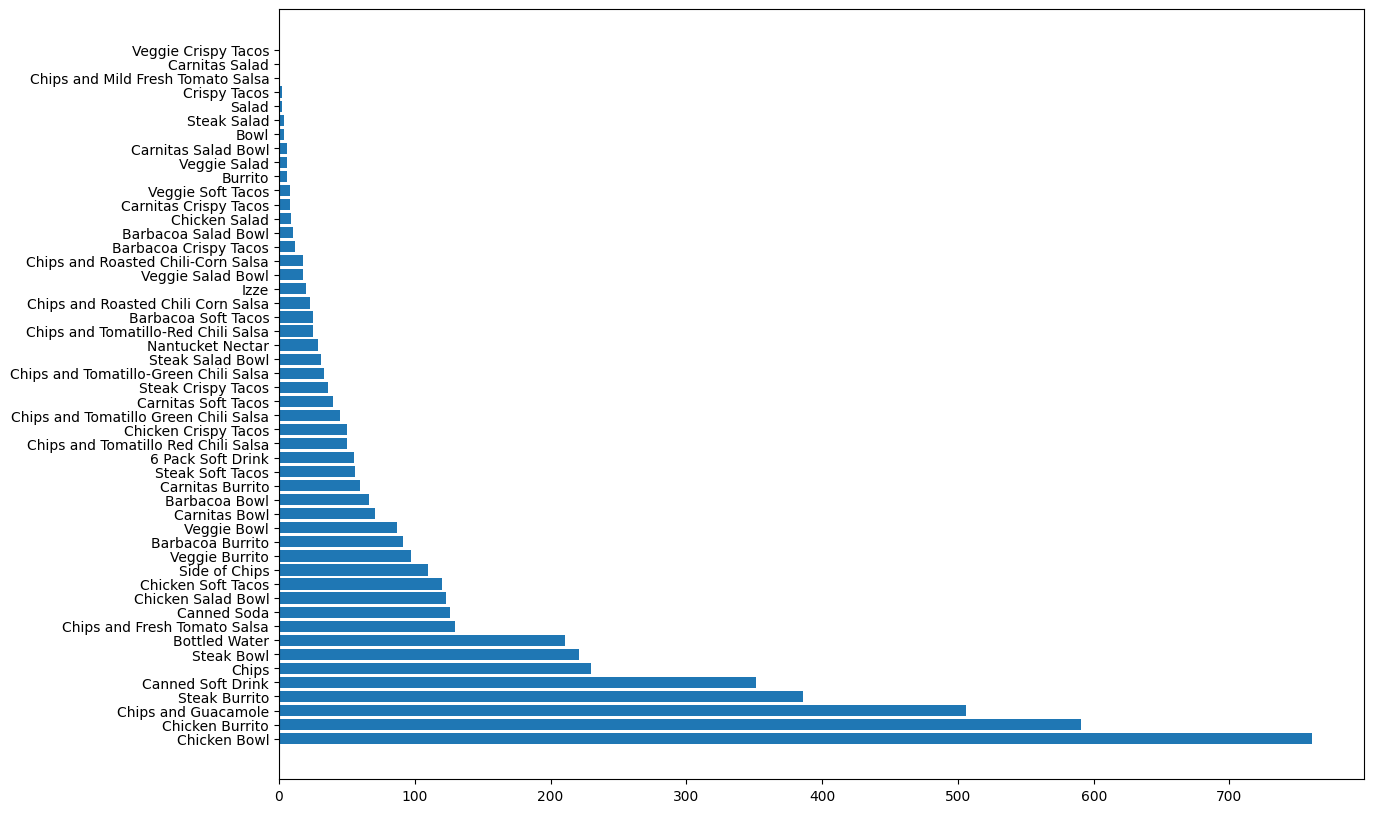

In [44]:
x = group_data2['item_name']
u = group_data2['quantity']
plt.figure(figsize=(14,10))
plt.barh(x,y)
plt.show()

In [45]:
## item_price의 "$"표시를 삭제

# case1
chipo['item_price'].str.replace("$","")

# case2(apply + lamda)
chipo['item_price'].apply(lambda x : x.replace("$",""))

# case3(apply + 함수)
def change(x):
    result = x.replace("$","")
    return float(result)   
chipo['item_price'].apply(change)

# case4
chipo['item_price'] = chipo['item_price'].str.lstrip('$').astype('float')   
# lstrip은 공백제거 함수인데, 삭제하고 싶은 문자열 기재
# astype: 타입 변경

C:\Users\ezen\AppData\Local\Temp\ipykernel_3900\1002214862.py:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  chipo['item_price'].str.replace("$","")


In [ ]:
# order_id의 데이터의 형태를 str 변경
chipo['order_id'] = chipo['order_id'].astype('str')  

In [ ]:
chipo.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,2.39
1,1,1,Izze,[Clementine],3.39
2,1,1,Nantucket Nectar,[Apple],3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",10.98
6,3,1,Side of Chips,NaN,1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",9.25


In [ ]:
# 주문당 평균 금액 
chipo.groupby('order_id').sum().info()



<class 'pandas.core.frame.DataFrame'>
Index: 1834 entries, 1 to 999
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   quantity    1834 non-null   int64  
 1   item_price  1834 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 43.0+ KB


C:\Users\ezen\AppData\Local\Temp\ipykernel_3900\1740274532.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  chipo.groupby('order_id').sum().info()


In [ ]:
chipo.groupby('order_id').sum()['item_price'].mean()

C:\Users\ezen\AppData\Local\Temp\ipykernel_3900\518303108.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  chipo.groupby('order_id').sum()['item_price'].mean()


18.811428571428568